# Support Vector Machines (SVMs)

## Introduction

Support Vector Machines (SVMs) are a popular machine learning method for classification,
regression, and other learning tasks. SVM concept originates in classification setting and a technique called Support Vector Classifiers.

SVM works by introducing an optimal hyperplane between the multi-dimensional data points. An hyperplane is a multi-dimensional structure that extends a two-dimensional plane. If the datasets consists of two dimensional dataset, then an estimate line is fit that provides the best classification on the  dataset. In general in a p-dimensional dataset the hyperplane is a p-1 dimensions structure. By "best classification", it is to be noted that a plane that not necessarily provides perfect classification of all points in the training dataset but fits a criterion such that the line is farthest from all points. You can see from the figure below that a hyperplane classifies the dataset as shown.


<img src='../../../images/SVM.PNG'>

Support vector machines (SVMs) are useful when there are very many input variables or when input variables interact with the outcome or with each other in complicated (nonlinear) ways. SVMs make fewer assump-
tions about variable distribution than do many other methods, which makes them especially useful when the training data isn’t completely representative of the way the data is distributed in production.


The SVM Regressor is an extension of the SVM classifier that can be used to fit continuous data.


## Visualizing the hyperplane

* Run the below code to visualize the hyperplane from data


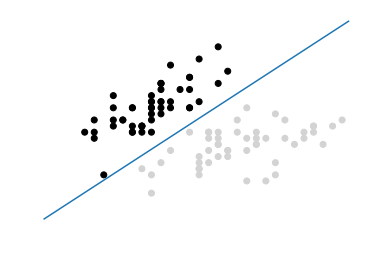

In [11]:
%matplotlib inline
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

# Load data with only two classes and two features
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]

# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(X_std, y)

# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

## Solution

Hit run on the above code

In the above plot, the SVM separates the two classes by a hyperplane. 
This hyperplane is the one that has the maximum margin between the two classes.

## SVM in Regression

In regression setting, SVM can be adopted to provide better results than a linear model.

<img src='../../../images/SVR.PNG'>

Courtesy: Predicting Top-of-Atmosphere Thermal Radiance Using MERRA-2 Atmospheric Data with Deep Learning - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Schematic-of-the-one-dimensional-support-vector-regression-SVR-model-Only-the-points_fig5_320916953 

### Kernels

#### Linear Kernel

First let us try SVR with linear kernel and see how it fares.

For using SVR with linear kernel we need to use import sklearn.svm.SVR. Then use kernel='linear' parameter. 
It can be one of ‘linear’, ‘poly’, ‘rbf’ or ‘sigmoid’. Here we start with linear.

Here is the code snippet to be used:

```python
from sklearn.svm import SVR

linear_kernel = SVR(kernel='linear', C=100, gamma='auto')
```

Note the tuning parameter C=100 and the gamma='auto' parameter.

C is the tuning paramater or penalty parameter of the error term in the SVM.
gamma is the Kernel coefficient and relevant only for ‘rbf’, ‘poly’ and ‘sigmoid’ kernels. 

### Exercise :

Initialize X and y variables and build SVR model with linear kernel.
(Just run the code)

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################

svr_lin = SVR(kernel='linear', C=100, gamma='auto')
y_lin = svr_lin.fit(X, y).predict(X)
print(mean_squared_error(y,y_lin))


0.2774911100648275


### Solution
Just run the code

#### Polynomial Kernel

Now let us try SVR with polynomial kernel and see whether it is better than a linear kernel for our generated dataset.

For using SVR with polynomial kernel after importing sklearn.svm.SVR, we need to use kernel='poly' parameter. 

Here is the code snippet to be used:

```python
from sklearn.svm import SVR

polynomial_kernel = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
```

Besides the penalty parameter C=100 and gamma=auto we use degree=3, for 3rd degree polynomial.
We also use epsilon=.1, to specify the margin of tolerance and coef0=1 - it's an independent term in kernel function and used only for kernel types ‘poly’ and ‘sigmoid’.

### Exercise :

Initialize X and y variables and build SVR model with poly kernel.
Create svr_poly, y_poly and print mean_squared_error similar to linear kernel code.

In [13]:
#Modify the code below
#svr_poly = ?
#y_poly = ?

#print(mean_squared_error(y,y_poly))


### Solution

```python

svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_poly = svr_poly.fit(X, y).predict(X)

print(mean_squared_error(y,y_poly))

```

#### Radial (rbf) Kernel

Now let us try SVR with radial(rbf) kernel and see whether it is better than a linear and poly kernels for our generated dataset.

For using SVR with radial(rbf) kernel after importing sklearn.svm.SVR, we need to use kernel='rbf' parameter. 

Here is the code snippet to be used:

```python
from sklearn.svm import SVR

rbf_kernel = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

```

Besides the penalty parameter C=100 and gamma=auto we use degree=3, for 3rd degree polynomial.
We also use epsilon=.1, to specify the margin of tolerance and coef0=1 - it's an independent term in kernel function and used only for kernel types ‘poly’ and ‘sigmoid’.

### Exercise :

Initialize X and y variables and build SVR model with radial kernel.

Create svr_rbf, y_rbf and print mean_squared_error similar to linear kernel code.

In [14]:
#write your code below


### Solution

```python
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
y_rbf = svr_rbf.fit(X, y).predict(X)
print(mean_squared_error(y,y_rbf))

```


### Visualizing the results of linear, poly and rbf

* Run the below code to visualize the SVM from linear, poly and rbf 

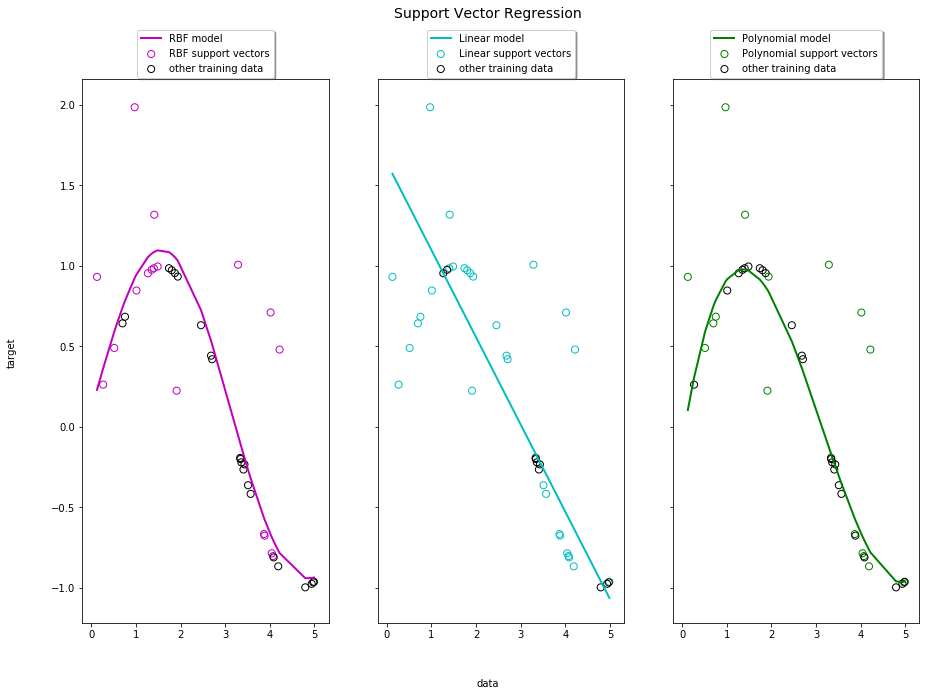

In [15]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### Solution
Just run the code

(End of Notebook)